In [1]:
import xgboost

In [3]:
# First XGBoost model for Pima Indians dataset
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [25]:
# load data
dataset =np.loadtxt('pima-indians-diabetes.csv',delimiter=',')
# split data into X and y
X = dataset[:,0:8]
y = dataset[:,8]
# split data into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=7)

In [18]:
# fit model with train data
model = XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [19]:
# make predictions for test data
y_pre = model.predict(X_test)
predictions = [round(value) for value in y_pre]
# evaluate predictions
accuracy = accuracy_score(y_test,predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.95%


In [38]:
eval_set = [(X_test,y_test)]
model = XGBClassifier()
model.fit?(X_train,y_train,early_stopping_rounds=10,eval_metric='logloss',eval_set=eval_set,verbose=True)
y_pre = model.predict(X_test)
predictions = [round(value) for value in y_pre]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-logloss:0.660186
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.634854
[2]	validation_0-logloss:0.612239
[3]	validation_0-logloss:0.593118
[4]	validation_0-logloss:0.578303
[5]	validation_0-logloss:0.564942
[6]	validation_0-logloss:0.555113
[7]	validation_0-logloss:0.54499
[8]	validation_0-logloss:0.539151
[9]	validation_0-logloss:0.531819
[10]	validation_0-logloss:0.526065
[11]	validation_0-logloss:0.51977
[12]	validation_0-logloss:0.514979
[13]	validation_0-logloss:0.50927
[14]	validation_0-logloss:0.506086
[15]	validation_0-logloss:0.503565
[16]	validation_0-logloss:0.503591
[17]	validation_0-logloss:0.500805
[18]	validation_0-logloss:0.497605
[19]	validation_0-logloss:0.495328
[20]	validation_0-logloss:0.494777
[21]	validation_0-logloss:0.494274
[22]	validation_0-logloss:0.493333
[23]	validation_0-logloss:0.492211
[24]	validation_0-logloss:0.491936
[25]	validation_0-logloss:0.490578
[26]	validation_0-logloss:0.490895


用XGBoost衡量特征的重要程度

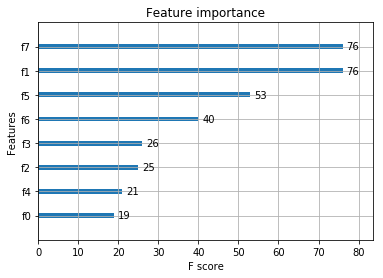

In [28]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
plot_importance(model)
plt.show()

In [34]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold
model = XGBClassifier()
eta = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(eta=eta)
kfold = StratifiedKFold(n_splits=10,shuffle=True,random_state=7)
grid_search = GridSearchCV(model,param_grid=param_grid,scoring='neg_log_loss',n_jobs=-1,cv=kfold,iid=True)
grid_result = grid_search.fit(X_train,y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print("%f  with: %r" % (mean, param))

Best: -0.501915 using {'eta': 0.0001}
-0.501915  with: {'eta': 0.0001}
-0.501915  with: {'eta': 0.001}
-0.501915  with: {'eta': 0.01}
-0.501915  with: {'eta': 0.1}
-0.501915  with: {'eta': 0.2}
-0.501915  with: {'eta': 0.3}
